# Medical MNIST
 
**Autori:** Erik Matovič a Simon Kokavec   
**Dataset:** https://www.kaggle.com/andrewmvd/medical-mnist [1]   
**Percentuálny podiel:** 50/50  
## Exploratory Data Analysis

### Výber obrázkov pre zobrazenie

 - v tejto časti sme sa inšpirovali týmto [zdrojom](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)
 - najprv získame všetky priečinky, v ktorých máme naše obrázkové dáta:  

In [1]:
import os

data_dir = '../data/' # image folder

data_folders = [name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
data_folders

['Hand', 'AbdomenCT', 'HeadCT', 'train', 'BreastMRI', 'ChestCT', 'CXR', 'test']

 - pozrieme sa vybrané 3 obrázky z každého priečinka a spočítame celkový počet našich obrázkových dát - máme 58954 obrázkov; zároveň najmenej dát máme z BreastMRI, jediný priečinok pod 10 tisíc obrázkov
 - zároveň sme zistili, že farebný model obrázka je tvorený 8 bitmi v čiernobielom(tzv. grayscale) farebnom modeli(označené ako L v inštancii PIL image)
 - všetky vybraté obrázky majú rovnakú šírku a výšku a to 100 pixelov
 - zároveň sme vypísali aj potrebné informácie o obrázkoch
 - z náhodného prezretia obrázkov vidíme, že niektoré obrázky su menej kvalitné
 - o kvalite obrázkov svedčia aj minimálne a maximálne hodnoty pixelov, niektoré obrázky využívajú plný rozsah 8 bitového kanálu, t.j. 256 hodnôt od 0 po 255, tie su viac kvalitnejšie, avšak niektoré majú minimálnu hodnotu pixela okolo hodnoty 100, a teda kvalita čiernej farby pozadia obrázka nebude taká kvalitná ako keby bola hodnota 0 a opačne, nie ktoré obrázky nemajú maximálnu hodnotu 255, a teda sýtosť bielej farby nebude taka, ako pri hodnote 255

Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)


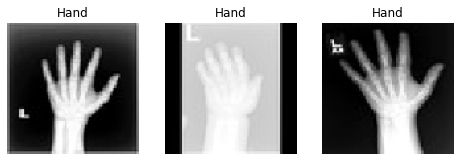

../data/Hand has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (83, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (79, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (84, 255)


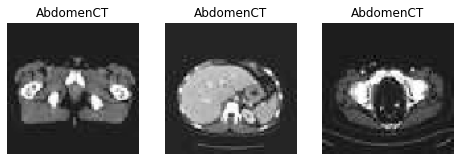

../data/AbdomenCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)


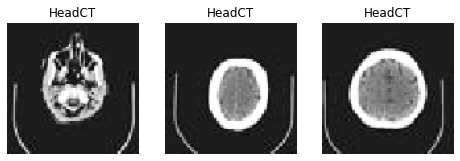

../data/HeadCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 249)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 244)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 237)


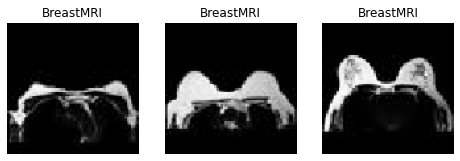

../data/BreastMRI has 8954 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (119, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (121, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (120, 255)


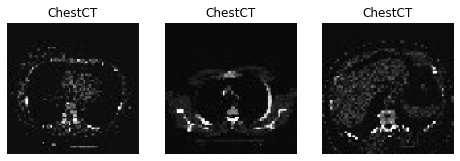

../data/ChestCT has 10000 files
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)
Image's color model is: L
Image's size is(width, height): (100, 100)
Image's info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
Image's pixel values(min, max): (0, 255)


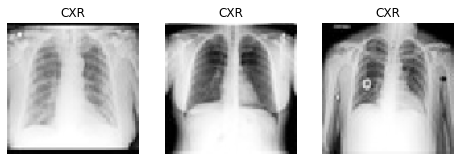

../data/CXR has 10000 files
We have 58954 images in total


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

all_data = 0 # counter
classes = dict()

# get data from each folder
for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
    
    # get the list of jpegs from sub image class folders
    imgs = [fn for fn in os.listdir(data_dir + folder) if fn.endswith('.jpeg')]

    # randomly select 3 images from folder
    random_select = np.random.choice(imgs, 3, replace = False)
    
    # plotting 1 x 3 image matrix
    fig = plt.figure(figsize = (8,6))
    for i in range(3):
        fp = data_dir + folder + '/' + random_select[i]
        ax = fig.add_subplot(1, 3, i+1)

        # to plot without rescaling, remove target_size
        fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
        print("Image's color model is:", fn.mode)
        print("Image's size is(width, height):", fn.size)
        print("Image's info:", fn.info)
        print("Image's pixel values(min, max):", fn.getextrema())
        plt.imshow(fn, cmap='Greys_r')
        plt.title(folder)
        plt.axis('off')
    plt.show()

    # also check the number of files here
    all_data += len(imgs)
    classes[folder] = len(imgs)
    print(f'{data_dir + folder} has {len(imgs)} files')

print(f'We have {all_data} images in total')

### Počet dát po jednotlivých triedach

 - v tejto časti sme graficky znázornili počet dát/obrázkov v našich triedach; triedy Hand, AbdomenCT, HradCT, ChestCT a CXR majú rovnaký počet obrázkov a to desať tisíc a jediná trieda, BreastMRI, má menej obrázkov a to 8954, dokopy máme 58954 obrázkov ako náš dataset

<AxesSubplot:>

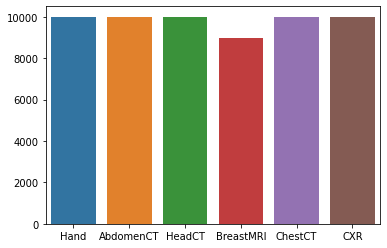

In [3]:
import seaborn as sns

keys = list(classes.keys())

no_img = [classes[key] for key in keys] # get number of images in the same order as keys
sns.barplot(x=keys, y=no_img)

### Rozdelenie datasetu na trénovaciu a testovaciu množinu  
- je dôležité si rozdeliť náš dataset na trénovací a testovací ešte pred tým než začneme vytvárať náš model

In [4]:
import shutil
import os
import numpy as np

for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
        
    # if directory exist, skip
    if (os.path.isdir(data_dir +'train/' + folder)):
        continue
        
    # otherwise create one
    os.makedirs(data_dir +'train/' + folder)
    os.makedirs(data_dir +'test/' + folder)
    source_dir = data_dir + folder
    allFileNames = os.listdir(source_dir)
    np.random.shuffle(allFileNames)
    
    # 20% nasich dat bude testovacich
    test_ratio = 0.20

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])
    
    train_FileNames = [source_dir + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [source_dir + '/' + name for name in test_FileNames.tolist()]
    
    for name in train_FileNames:
      shutil.copy(name, data_dir +'train/' + folder)
    for name in test_FileNames:
      shutil.copy(name, data_dir +'test/' + folder)
print('Done!')

Done!


 - rozdelili sme to v miere 80% dát ako trénovacích a 20% dát ako testovacích
 - zistili sme ďalšie údaje v rámci prieskumnej analýzy údajov:
     - obrázky sú v rozsahu 64x64
     - 47163 obrázkov predstavuje 80% nášho datasetu, čo je v rámci trénovania, v testovaní je zvyšných 20% z nášho datasetu
     - máme 6 tried v klasifikácií: Hand, AbdomenCT, HeadCT, BreastMRI, ChestCT, CXR

In [5]:
from PIL import Image

# set paths for the dataset
train_dir = '../data/train/'
test_dir = '../data/test/'

# get class names, equal as data_folders upper
class_names = os.listdir(train_dir)  
class_names_test = os.listdir(test_dir)  

# get a number of classes, which is a number of subdirectories
no_classes = len(class_names)        

# get list of images' filenames based on classes
# list has lenght of no_classes and each index have imgs of a class
images_classes = list(range(no_classes))
for i in range(0, no_classes, 1):
    images_classes[i] = list()
    for x in os.listdir(os.path.join(train_dir, class_names[i])):
        images_classes[i].append(os.path.join(train_dir, class_names[i], x))

        
images_classes_test = list(range(no_classes))
for i in range(0, no_classes, 1):
    images_classes_test[i] = list()
    for x in os.listdir(os.path.join(test_dir, class_names_test[i])):
        images_classes_test[i].append(os.path.join(test_dir, class_names_test[i], x))
            
# get number of images of each class
no_imgs_class = list()     
for folder in range(0, no_classes, 1):
    no_imgs_class.append(len(images_classes[folder]))
    
no_imgs_class_test = list()
for folder in range(0, no_classes, 1):
    no_imgs_class_test.append(len(images_classes_test[folder]))
    
# get list of filenames for testing & training
imgs_files = list()           
img_files_test = list()

# get the labels or the type of each individual img in the list
img_class = list()              
img_class_test = list()

# set variables of img_class & imgs_files
for folder in range(0, no_classes, 1):
    imgs_files.extend(images_classes[folder])
    img_class.extend([folder] * no_imgs_class[folder])
    
# set variables for training
for folder in range(0, no_classes, 1):
    img_files_test.extend(images_classes_test[folder])
    img_class_test.extend([folder] * no_imgs_class_test[folder])

# get total number of images
no_total_img = len(img_class)
no_total_img_train = len(img_class_test)

# get the dimensions
img_width, img_height = Image.open(imgs_files[0]).size         

print("There are", no_total_img, "images for training in", no_classes, "classes")
print("There are", no_total_img_train, "images for testing in", no_classes, "classes")
print("Label names:", class_names)
print("Label counts:", no_imgs_class)
print("Image dimensions:", img_width, "x", img_height)


There are 47163 images for training in 6 classes
There are 11791 images for testing in 6 classes
Label names: ['Hand', 'AbdomenCT', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR']
Label counts: [8000, 8000, 8000, 7163, 8000, 8000]
Image dimensions: 64 x 64


 - triedy Hand, AbdomenCT, HradCT, ChestCT a CXR majú rovnaký počet obrázkov a to osem tisíc a jediná trieda, BreastMRI, má menej obrázkov a to niečo cez sedem tisíc, dokopy máme 47163 obrázkov ako našu trénovaciu množinu

<AxesSubplot:>

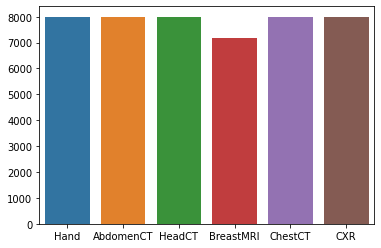

In [6]:
sns.barplot(x=class_names, y=no_imgs_class)

### Návrh modelu

 - vzhľadom na 6 tried a na medicínske obrázky sme sa rozhodli navrhnúť model klasifikátora na základe konvolučnej neurónovej siete, ktorá sa používa na klasifikovanie alebo segmentovanie obrazových dát
 - z prieskumnej analýzy údajov vidíme, že bude potrebné transformovať hodnoty pixelov na rovnakú škálu, pretože v súčasnosti nie všetky hodnoty pixelov obrázkov nezačínajú a nekončia na rovnakých hodnotách

## Model

 - pre implementáciu modelu sme sa rozhodli použiť modul PyTorch s využitím CUDA architektúry pre paralelizáciu výpočtov na GPU, v prípade ak na stroji nie je grafická karta podporujúca CUDA architektúru, tak výpočty prebehnú na CPU, čo je avšak pomalšie

In [7]:
import numpy as np
import os
import time
%matplotlib inline
import matplotlib.pyplot as mp
import torch
import torchvision 

# run PyTorch on CUDA architecture
if torch.cuda.is_available():     
    dev = torch.device("cuda:0")
    kwar = {'num_workers': 8, 'pin_memory': True}
    cpu = torch.device("cpu")
else:
    print("Warning: CUDA not found, CPU only.")
    dev = torch.device("cpu")
    kwar = {}
    cpu = torch.device("cpu")

print(dev, kwar, cpu)

cuda:0 {'num_workers': 8, 'pin_memory': True} cpu


 - použili sme PyTorch s verziou 1.10.1 a s CUDA architektúrou 11.3

In [8]:
print(torch.__version__) 

1.10.1+cu113


 - pre správne extrahovanie informácií z pixelov kvoli grayscale farebnému modelu zvýšime kontrast, a preto preškálujeme obrázky na hodnoty pixelov od 0 po 1
 - zároveň je dôležité konvertovať obrázky typu JPEG na dátový typ tensors

In [9]:
toTensor = torchvision.transforms.ToTensor()

# Load, scale, and stack image tensor
tensors = list()
for img_path in imgs_files:
    PIL_img = Image.open(img_path)
    # from PIL image, get a tensor
    tensor_img = toTensor(PIL_img)
    
    # the image isn't empty, rescale its values to run from 0 to 1
    if(tensor_img.min() < tensor_img.max()):  
        tensor_img = (tensor_img - tensor_img.min()) / (tensor_img.max() - tensor_img.min()) 
    
    # append list of tensors
    tensors.append(tensor_img)
    
# stack image (X) tensor
img_tensor = torch.stack(tensors) 
    
# Create label (Y) tensor
class_tensor = torch.tensor(img_class)  

# Get look at rescaled values
print(f'After rescaling, min pixel value: {img_tensor.min().item()} and max pixel value: {img_tensor.max().item()}')


# do this for testing
tensors_test = list()
for img_path in img_files_test:
    PIL_img = Image.open(img_path)
    # from PIL image, get a tensor
    tensor_img = toTensor(PIL_img)
    
    # the image isn't empty, rescale its values to run from 0 to 1
    if(tensor_img.min() < tensor_img.max()):  
        tensor_img = (tensor_img - tensor_img.min()) / (tensor_img.max() - tensor_img.min()) 
    
    # append list of tensors
    tensors_test.append(tensor_img)
    
# stack image (X) tensor
img_tensor_test = torch.stack(tensors_test) 
    
# Create label (Y) tensor
class_tensor_test = torch.tensor(img_class_test)  

After rescaling, min pixel value: 0.0 and max pixel value: 1.0


 - vytvoríme triedu nášho modelu založeného na konvolučnej umelej neurónovej sieti pomocou modulu PyTorch, pričom všetky výpočty budú rozdelené na grafickej jendotke pomocou architektúry CUDA, nevyhnutné, aby grafická karta a stroj podporovali CUDA architektúru  
 - ako aktivačnú funkciu sme vybrali RELU, ktorá nepredpokladá záporné hodnoty, môžme ju definovať ako __f(x) = max(0, x)__, kde __x__ je náš vstup, vzhľadom na to, že máme hodnoty pixelov od 0 po 255 vo farebnom modely grayscale, tak nemusíme pracovať so zápornými hodnotami

In [10]:
class CNN_ANN(torch.nn.Module):
    """
    :param torch.nn.Module: Base class for all neural network modules.
    
    Based on the architecture of the convolutional neural network with RELU.
    The number of labels = the output layer nodes.
    
    This model work only with images with 1 channel, so in grayscale color space for this particular assignment.
    """
    convolution = (5, 10)
    convolution_size = 7
     
    def __init__(self, img_width, img_height, no_labels): 
        """
        :param self: object
        :param img_width: Image's x dimension
        :param img_height: Image's y dimension
        :param no_labels: Number of labels
        
        Initialize a model based on the architecture of the convolutional neural network 
        with Rectified Linear Unit activation function. 
        
        We apply convolution tuple to pixels in our model, while in the convolution convolution_size is the number of surrounding pixels.
        Formula input_layer_no_nodes calculates last node in order to connect layers.
        
        Image's height with image's width decreases with each convolution, because it makes image smaller. 
        """       

        # Set constructor of torch.nn.Module in order set up the CNN_ANN class
        super(CNN_ANN,self).__init__()  

        # Set number of nodes for the input layer.
        self.input_layer_no_nodes = self.convolution[1]*(img_width-(self.convolution_size-1)-(self.convolution_size-1))*(img_height-(self.convolution_size-1)-(self.convolution_size-1))
   
        # Store weights between layers
        # Override atribures for base class.
        # nn.Conv2d(channels in, channels out, convolution height/width)        
        no_channels = 1 # grayscale, for RGB we would have 3 
        self.cnv1 = torch.nn.Conv2d(no_channels, self.convolution[0], self.convolution_size)
        self.cnv2 = torch.nn.Conv2d(self.convolution[0], self.convolution[1], self.convolution_size)


        # Define the number of output nodes for fully connected layers
        fully_connected_layer1_no_nodes = 400
        fully_connected_layer2_no_nodes = 80
        
        # Stores the weights between the fully connected layers
        # nn.Linear(nodes in, nodes out)
        self.weight_full_connected_layer1 = torch.nn.Linear(self.input_layer_no_nodes, fully_connected_layer1_no_nodes)
        self.weight_full_connected_layer2 = torch.nn.Linear(fully_connected_layer1_no_nodes, fully_connected_layer2_no_nodes)
        self.weight_full_connected_layer_final = torch.nn.Linear(fully_connected_layer2_no_nodes, no_labels)
        
    def forward(self,x):
        """
        :param self: An object
        :param x: Input layer.
        :returns x: Output layer.
        
        Define how to get the output of the neural network. Needs to be implemented. 
        This is called when the neural network is applied to an input.
        
        Define the steps used in the computation of output from input.
        Use the weights defined in the constructor.
        We use RELU activaciton function.
        """
        
        # Apply RELU activation fuction for first convolutional layer 
        x = torch.nn.functional.relu(self.cnv1(x)) 
        
        # Apply RELU activation fuction for second convolutional layer
        x = torch.nn.functional.relu(self.cnv2(x)) 
        
        # Connect convolutional layer into connected layer
        x = x.view(-1, self.num_flat_features(x)) 
        
        # Apply RELU activation fuction for first connected layer
        x = torch.nn.functional.relu(self.weight_full_connected_layer1(x)) 
        
        # Apply RELU activation fuction for second connected layer
        x = torch.nn.functional.relu(self.weight_full_connected_layer2(x)) 
        
        # Final connected layer without RELU, calculate loss function
        x = self.weight_full_connected_layer_final(x)        
        
        # Return final connected layer
        return x

    def num_flat_features(self, x):  
        """
        :param self: An object
        :param x: Input layer
        : returns 
        
        Change x to a vector. Needs to be explicitly implemented.
        """
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

 - vytvoríme inštanciu nášho modelu:

In [11]:
# create model object and pass all calculations to the GPU with CUDA architecture
model = CNN_ANN(img_width, img_height, no_classes).to(dev)

 - vytvoríme zoznam obrázkov pre trénovanie a testovanie, 47163 obrázkov máme pre trénovanie a 11791 pre testovanie

In [12]:
test_img_numbers = list()
train_img_numbers = list()

# Add imgs into train list
for i in range(no_total_img):
        train_img_numbers.append(i)
        
# Add imgs into test list
for i in range(no_total_img_train):
        test_img_numbers.append(i)
        
# Count the number in each set
no_img_train = len(train_img_numbers)  
no_img_test = len(test_img_numbers)
print("Training images =", no_img_train, "Testing =", no_img_test)

Training images = 47163 Testing = 11791


 - vytvoríme tensor dátové typy pre trénovanie a testovanie:

In [13]:
train_ids = torch.tensor(train_img_numbers)    
test_ids = torch.tensor(test_img_numbers)
trainX = img_tensor[train_ids,:,:,:]
trainY = class_tensor[train_ids]
testX = img_tensor_test[test_ids,:,:,:]
testY = class_tensor_test[test_ids]

In [14]:
# Setting too large batch size will cause an out-of-memory error.
batch_size = 300           

# Number of training batches per epoch, round down to simplify last batch
trainBats = no_img_train // batch_size       

# Test batches, round up to include all
testBats = -(-no_img_test // batch_size)     

# Take into the account the imbalanced dataset.
weights = torch.zeros(no_classes)     

# Rarer images are counted more to the loss, so we prevent the model from ignoring rarer images.
for i in trainY.tolist():            
    weights[i].add_(1)              
    
# Weights should be inversely related to count
weights = 1. / weights.clamp_(min=1.)                     

# The weights average to 1, send to CUDA
weights = (weights * no_classes / weights.sum()).to(dev)

# Initialize an optimizer, lr means learning rate
optimizerSGD = torch.optim.SGD(model.parameters(), lr = 0.01)   

# Max training epochs = 10
for epoch in range(0, 10, 1):
    # Set model to training mode
    model.train()                     
    loss_epoch = 0.
    # Shuffle data to randomize batches
    permute = torch.randperm(no_img_train)  
    trainX = trainX[permute,:,:,:]
    trainY = trainY[permute]
    # Iterate over batches
    for j in range(trainBats):        
        # Zero out gradient accumulated in optimizer
        optimizerSGD.zero_grad()              
        # Slice shuffled data into batches
        batX = trainX[j*batch_size:(j+1)*batch_size,:,:,:].to(dev)   
        # .to(dev) moves these batches to the GPU
        batY = trainY[j*batch_size:(j+1)*batch_size].to(dev)    
        # Evalute predictions
        yOut = model(batX)            
        # Compute loss
        loss = torch.nn.functional.cross_entropy(yOut, batY,weight=weights) 
        # Add loss
        loss_epoch += loss.item()   
        # Backpropagate loss
        loss.backward()          
        # Update model weights using optimizer
        optimizerSGD.step()    
    print(f"Epoch = {epoch}; Training loss = {loss_epoch}")
    

Epoch = 0; Training loss = 145.28427016735077
Epoch = 1; Training loss = 49.575502313673496
Epoch = 2; Training loss = 17.359664175659418
Epoch = 3; Training loss = 11.54243259690702
Epoch = 4; Training loss = 27.563585113734007
Epoch = 5; Training loss = 7.668553179129958
Epoch = 6; Training loss = 6.286613781936467
Epoch = 7; Training loss = 5.627328121103346
Epoch = 8; Training loss = 3.3829187364317477
Epoch = 9; Training loss = 65.67981484439224


 - náš model mal korektné predikcie 11530 / 11791:

In [15]:
# Set an empty confusion matrix
confusion_matrix = np.zeros((no_classes,no_classes),dtype=int)    
model.eval()
with torch.no_grad():
    # Shuffle test data
    permute = torch.randperm(no_img_test)                     
    testX = testX[permute,:,:,:]
    testY = testY[permute]
    
    # Iterate over test batches
    for j in range(testBats):                           
        batX = testX[j*batch_size:(j+1)*batch_size,:,:,:].to(dev)
        batY = testY[j*batch_size:(j+1)*batch_size].to(dev)
        
        # Pass test batch through model
        yOut = model(batX)                 
        
        # Generate predictions by finding the max Y values
        pred = yOut.max(1,keepdim=True)[1]     
        
        # Bind actual and predicted to
        for j in torch.cat((batY.view_as(pred), pred),dim=1).tolist(): 
            # make (row, col) pairs, increment confusion matrix
            confusion_matrix[j[0],j[1]] += 1   
            
# Sum over diagonal elements to count correct predictions
correct_predictions = 0
for i in range(0, no_classes, 1):
    correct_predictions += confusion_matrix[i,i] 
print("Correct predictions: ", correct_predictions, "/", no_img_test)
print("Confusion Matrix:", confusion_matrix)
print(class_names)

Correct predictions:  11530 / 11791
Confusion Matrix: [[1949    9   18    1    0   23]
 [   0 1967    2    9   22    0]
 [   3   15 1875    0  106    1]
 [   0    0    0 1777   14    0]
 [   0   14    2    4 1980    0]
 [  16    0    2    0    0 1982]]
['Hand', 'AbdomenCT', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR']


 - evaluácia na testovaných dátach:

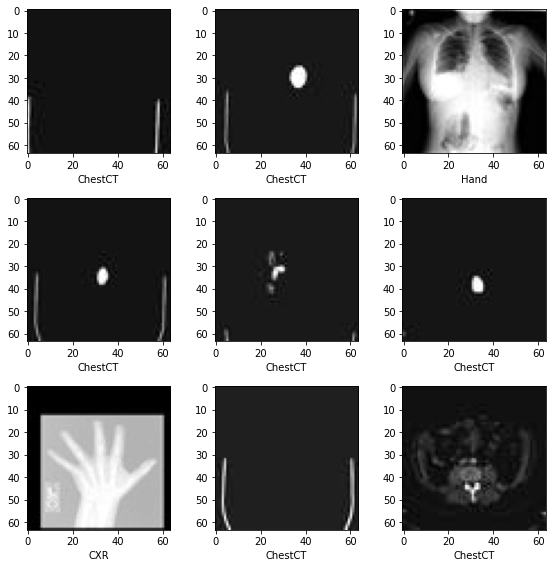

In [16]:
model.eval()
mp.subplots(3,3,figsize=(8,8))
imagesLeft = 9
# Shuffle test data
permute = torch.randperm(no_img_test)        
testX = testX[permute,:,:,:]
testY = testY[permute]
# Iterate over test batches
for j in range(testBats):              
    batX = testX[j*batch_size:(j+1)*batch_size,:,:,:].to(dev)
    batY = testY[j*batch_size:(j+1)*batch_size].to(dev)
    # Pass test batch through model
    yOut = model(batX)               
    # Generate predictions by finding the max Y values
    pred = yOut.max(1)[1].tolist()     
    for i, y in enumerate(batY.tolist()):
        # Compare the actual y value to the prediction
        if imagesLeft and y != pred[i]:         
            imagesLeft -= 1
            mp.subplot(3,3,9-imagesLeft)
            # Label image with what the model thinks it is
            mp.xlabel(class_names[pred[i]])   
            # Assuming the image isn't empty, rescale so its values run from 0 to 1
            #x = batX[i]
            if(batX[i].min() < batX[i].max()):      
                batX[i] = (batX[i] - batX[i].min()) / (batX[i].max() - batX[i].min())
            # Remove channel (grayscale anyway)
            y = batX[i][0].to(cpu).numpy() 
            mp.imshow(y,cmap='gray',vmin=0,vmax=1)
mp.tight_layout()
mp.show()

In [17]:
torch.save(model, 'saved_model')

## Bibliography

[1] Medical MNIST Classification, apolanco3225, 2017, GitHub, GitHub repository, https://github.com/apolanco3225/Medical-MNIST-Classification